## Лабораторна робота 4. **REGRESSION** 📈

# Опис вибірки "Motorbike Ambulance Calls"


Аварії за участю мотоциклів та відповідні виклики швидкої допомоги сильно залежать від екологічних та сезонних умов, таких як погодні умови, опади, день тижня, сезон, година дня тощо. Дані збирались протягом двох років щогодини та потім співвідносилися з відповідною погодою та сезонністю.

Основні характеристики вибірки `motorbike_ambulance_calls.csv`:

              - index: record index
              - date : date
              - season : season (1:springer, 2:summer, 3:fall, 4:winter)
              - yr : year (0: 2011, 1:2012)
              - mnth : month ( 1 to 12)
              - hr : hour (0 to 23)
              - holiday : whether day is holiday or not
              - weekday : day of the week
              - workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
              -  weathersit :
                      - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
                      - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
                      - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
                      - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
              - temp : Normalized temperature in Celsius. The values are divided to 41 (max)
              - atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
              - hum: Normalized humidity. The values are divided to 100 (max)
              - windspeed: Normalized wind speed. The values are divided to 67 (max)
              - cnt: count of total ambulance calls

## Імпорт необхідних бібліотек та завантаження даних

**Завдання 1** підготовка даних до опрацювання

1. завантажте вибірку `motorbike_ambulance_calls.csv`;   
2. підключіть необхідні бібліотеки;  
3. вивести основну статистичну інформацію по числовим змінним;  
4. окремо вивести максимальні та мінімальні значення по всім змінним;  
5. вивести розмірність датасету;

In [1]:
import pandas as pd
import numpy as np
import scipy as sc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ModuleNotFoundError: No module named 'scipy'

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("motorbike_ambulance_calls.csv")  

print("Basic statistical information:")
print(df.describe())

print("\nMinimum values:")
print(df.min(numeric_only=True))

print("\nMaximum values:")
print(df.max(numeric_only=True))

print("\nDataset dimension:", df.shape)

Basic statistical information:
            index            yr          mnth            hr       holiday  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      0.502561      6.537775     11.546752      0.028770   
std     5017.0295      0.500008      3.438776      6.914405      0.167165   
min        1.0000      0.000000      1.000000      0.000000      0.000000   
25%     4345.5000      0.000000      4.000000      6.000000      0.000000   
50%     8690.0000      1.000000      7.000000     12.000000      0.000000   
75%    13034.5000      1.000000     10.000000     18.000000      0.000000   
max    17379.0000      1.000000     12.000000     23.000000      1.000000   

            weekday    workingday    weathersit          temp         atemp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       3.003683      0.682721      1.425283      0.496987      0.475775   
std        2.005771      0.465431     

**Завдання 2** перевірити типи даних та перевірте кількість даних по кожній змінній.

In [2]:
import pandas as pd

df = pd.read_csv("motorbike_ambulance_calls.csv")  

print(df.dtypes, "\n") 
print(df.count()) 


FileNotFoundError: [Errno 2] No such file or directory: 'motorbike_ambulance_calls.csv'

**Завдання 3** пепевірте всі змінні на наявність пропусків.

In [3]:
import pandas as pd

df = pd.read_csv("motorbike_ambulance_calls.csv")  
print(df.isnull().sum())  

FileNotFoundError: [Errno 2] No such file or directory: 'motorbike_ambulance_calls.csv'

**Висновки з 1-3 завдання (детальні)**

1. The dataset contains 17379 records and 15 columns.
2. Most columns have numeric (int64, float64) or string (object) data types.
3. All columns have 17379 values, i.e. there are no missing data.


**Завдання 4** перетворіть змінну `date` в **date type**. Визначте часові межі датасету.

In [4]:
import pandas as pd
data = pd.read_csv("motorbike_ambulance_calls.csv")  

def transform_date(df: pd.DataFrame, date_col_name: str):
    df[date_col_name] = pd.to_datetime(df[date_col_name], dayfirst=True, errors='coerce')
    return df

data = transform_date(data, 'date')
print(data.dtypes)  
print(data['date'].min(), data['date'].max())  


FileNotFoundError: [Errno 2] No such file or directory: 'motorbike_ambulance_calls.csv'

In [11]:
def get_time_limits(df: pd.DataFrame, date_col_name: str):
    first_day = df[date_col_name].min()  
    last_day = df[date_col_name].max()  
    print(f"First day of dataset - {first_day}.\nLast day of dataset - {last_day}")
get_time_limits(data, 'date')


First day of dataset - 2011-01-01 00:00:00.
Last day of dataset - 2012-12-31 00:00:00


In [13]:
#Часові межі датасету: 1 січня 2011 — 31 грудня 2012.

#Аналіз категоріальних змінних

**Завдання 5** виділити категоріальні змінні в окремий датасет







In [ ]:
data_caterogical = data.select_dtypes(include=['object', 'category'])
print(data.nunique())  

index         17379
date            731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
cnt             869
dtype: int64


**Завдання 6** перетворіть змінну `season` в числову шкалу.

In [33]:
import pandas as pd
data = pd.read_csv("motorbike_ambulance_calls.csv")

def encode_season(df: pd.DataFrame, season_col_name: str):
    season_mapping = {
        'spring': 1,
        'summer': 2,
        'fall': 3,
        'winter': 4
    }
    df[season_col_name] = df[season_col_name].map(season_mapping)
    return df

data = encode_season(data, 'season')

print(data[['season']].head())


   season
0     1.0
1     1.0
2     1.0
3     1.0
4     1.0


**Завдання 7** побудувати графіки `countplot` по всім категоріальним змінним

Variable types in a dataset:
index           int64
date           object
season         object
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object


C:\Users\Artur\AppData\Local\Temp\ipykernel_8808\2896732376.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  subplot.set_xticklabels(subplot.get_xticklabels(), rotation=45)
C:\Users\Artur\AppData\Local\Temp\ipykernel_8808\2896732376.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  subplot.set_xticklabels(subplot.get_xticklabels(), rotation=45)
C:\Users\Artur\AppData\Local\Temp\ipykernel_8808\2896732376.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  subplot.set_xticklabels(subplot.get_xticklabels(), rotation=45)
C:\Users\Artur\AppData\Local\Temp\ipykernel_8808\2896732376.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  subplot.set_xticklab

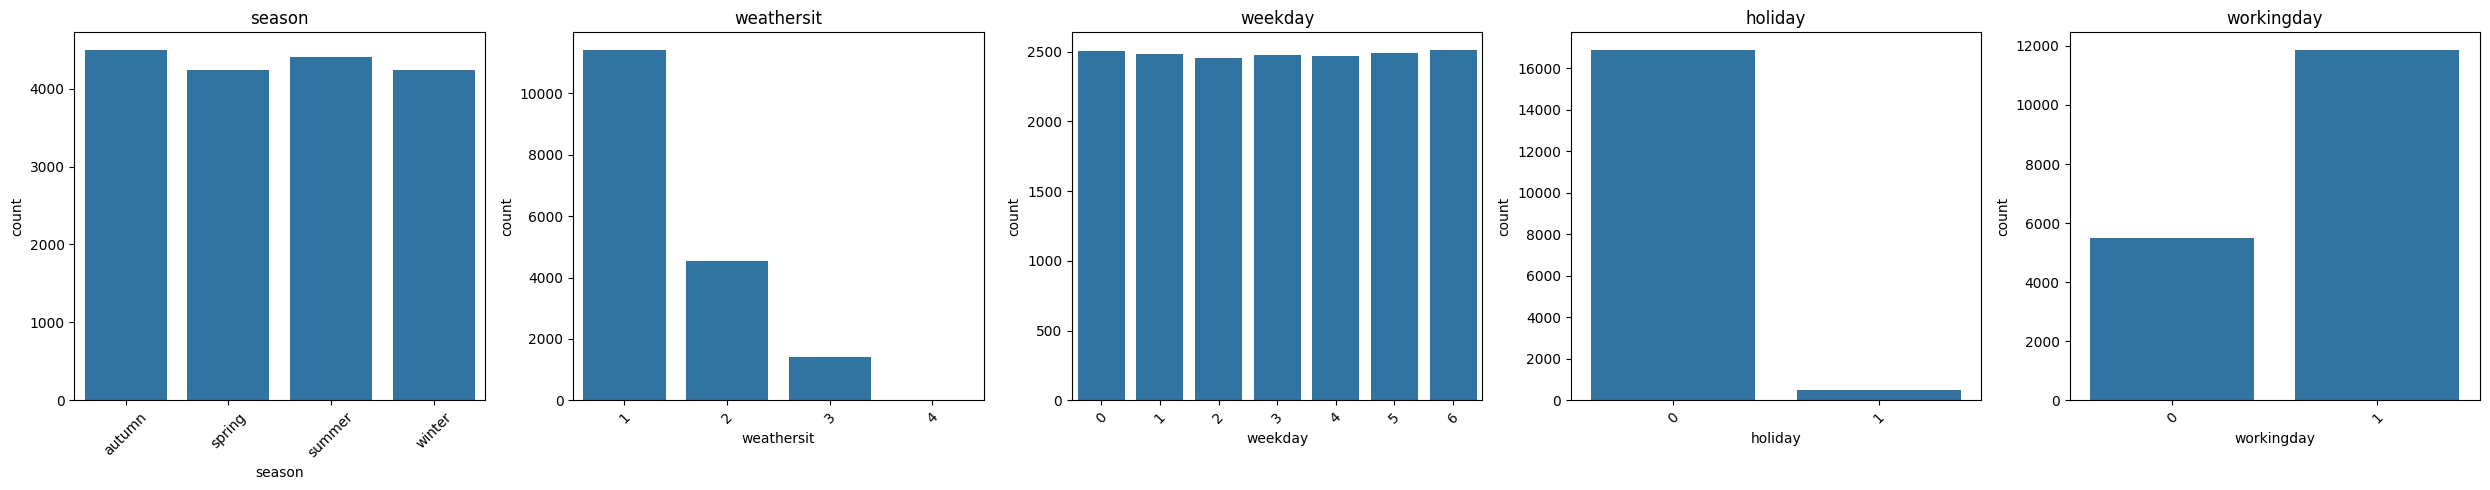

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
data = pd.read_csv("motorbike_ambulance_calls.csv")

print("Variable types in a dataset:")
print(data.dtypes)

categorical_columns = ['season', 'weathersit', 'weekday', 'holiday', 'workingday']  
data_categorical = data[categorical_columns].astype('category')

if not data_categorical.empty:
    fig, ax = plt.subplots(1, len(data_categorical.columns), figsize=(5 * len(data_categorical.columns), 5))
    
    if len(data_categorical.columns) == 1:
        ax = [ax]

    for variable, subplot in zip(data_categorical.columns, ax):
        sns.countplot(x=data_categorical[variable], ax=subplot)
        subplot.set_title(variable)
        subplot.set_xticklabels(subplot.get_xticklabels(), rotation=45)

    plt.tight_layout()
    plt.show()
else:
    print("There are no categorical variables in the dataset..")


**Висновки з 5-7 завдання (детальні)**



1.   Categorical variables were separated into a separate dataset.
2.   season was originally text (spring, summer, fall, winter) then I changed it to 1,2,3,4
3.   season: Ambulance calls are evenly distributed across all seasons.
weathersit: Most calls in clear weather, fewer in rain and snow.
weekday: The number of calls is almost even across the days of the week.
holiday: There are fewer calls on holidays than on weekdays.
workingday: The number of calls on weekdays is significantly higher than on weekends.



#Аналіз числових змінних

**Завдання 8** виділити числові змінні в окремий датасет

In [ ]:
import pandas as pd

data = pd.read_csv("motorbike_ambulance_calls.csv")

data_numerical = data.select_dtypes(include=['int64', 'float64'])

print(data_numerical.head())


   index  yr  mnth  hr  holiday  weekday  workingday  weathersit  temp  \
0      1   0     1   0        0        6           0           1  0.24   
1      2   0     1   1        0        6           0           1  0.22   
2      3   0     1   2        0        6           0           1  0.22   
3      4   0     1   3        0        6           0           1  0.24   
4      5   0     1   4        0        6           0           1  0.24   

    atemp   hum  windspeed  cnt  
0  0.2879  0.81        0.0   16  
1  0.2727  0.80        0.0   40  
2  0.2727  0.80        0.0   32  
3  0.2879  0.75        0.0   13  
4  0.2879  0.75        0.0    1  


**Завдання 9** побудуйте гістограми розподілу по всім числовим змінним

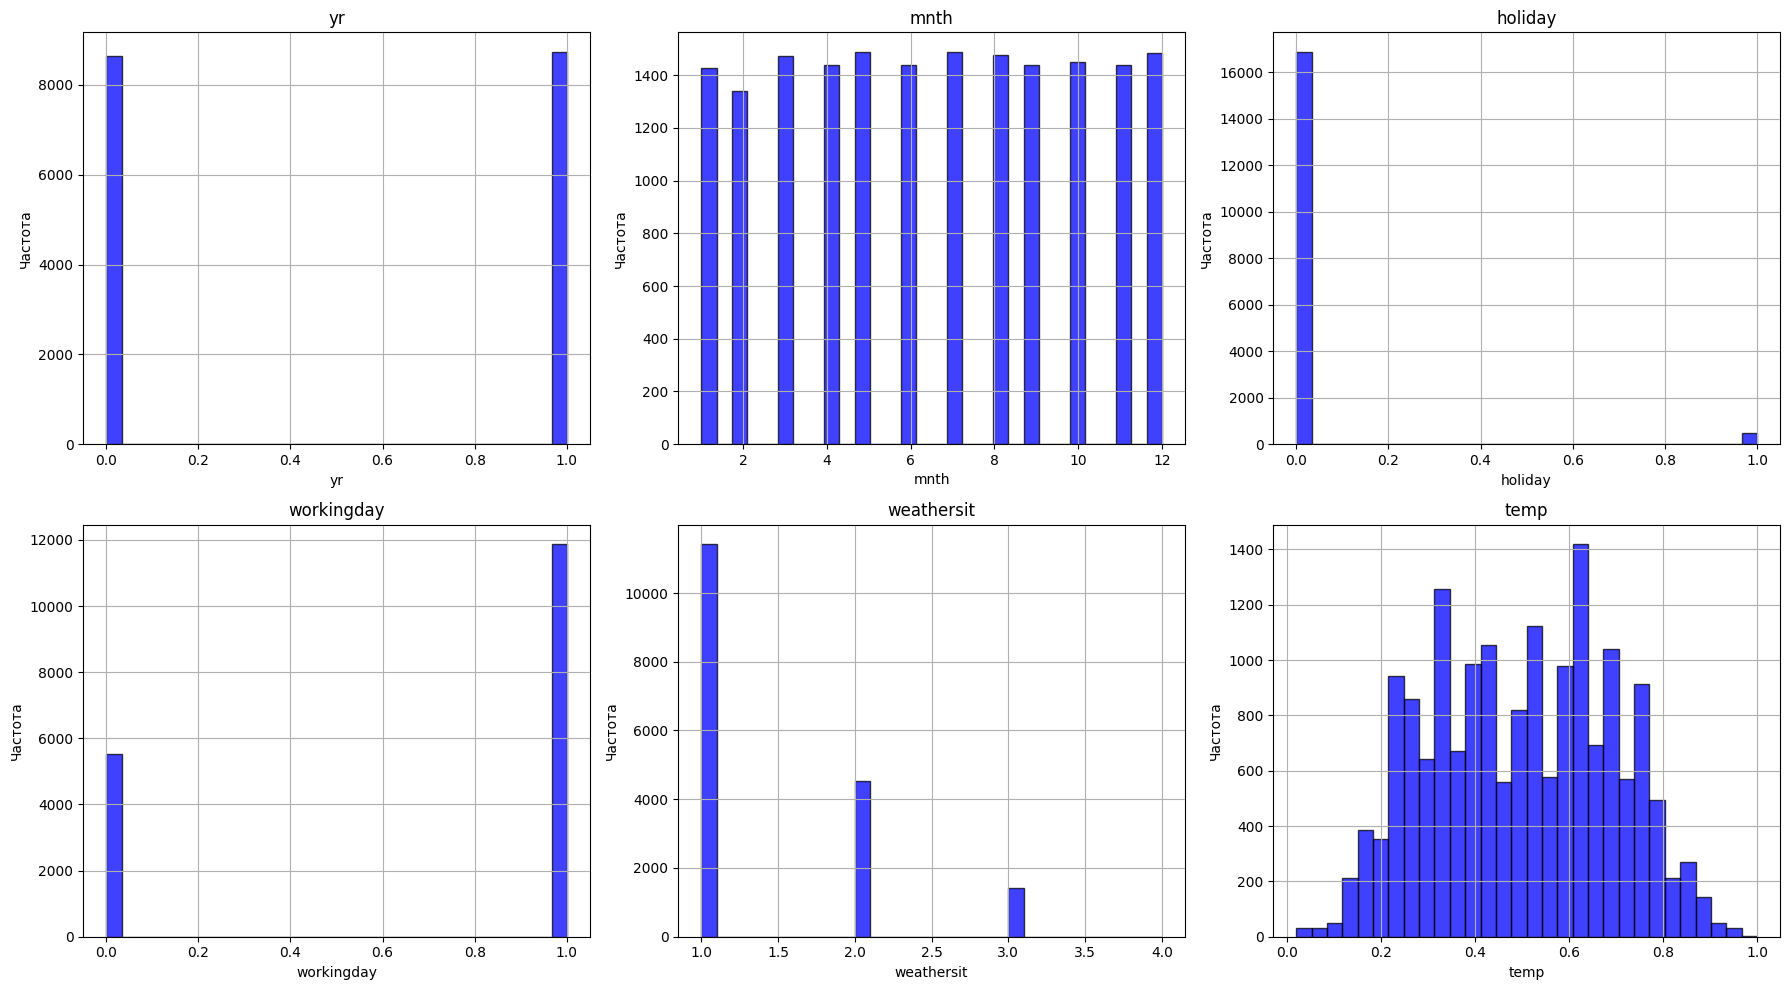

In [ ]:
import matplotlib.pyplot as plt

selected_columns = ['yr', 'mnth', 'holiday', 'workingday', 'weathersit', 'temp']
data_selected = data_numerical[selected_columns]

fig, ax = plt.subplots(2, 3, figsize=(18, 10))
ax = ax.flatten()

for i, col in enumerate(selected_columns):
    data_selected[col].hist(bins=30, ax=ax[i], alpha=0.75, color='blue', edgecolor='black')
    ax[i].set_title(col)
    ax[i].set_xlabel(col)
    ax[i].set_ylabel("Частота")

plt.tight_layout()
plt.show()


**Завдання 10** побудуйте гістограму розподілу цільової змінної та розрахуйте коефіціент нахилу

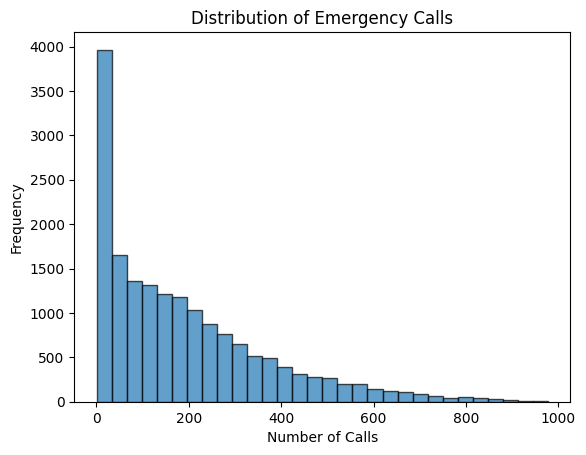

Slope coefficient: 0.0101


In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

df = pd.read_csv("motorbike_ambulance_calls.csv")

plt.hist(df["cnt"], bins=30, edgecolor="black", alpha=0.7)
plt.xlabel("Number of Calls")
plt.ylabel("Frequency")
plt.title("Distribution of Emergency Calls")
plt.show()

slope, _, _, _, _ = linregress(range(len(df["cnt"])), df["cnt"])
print(f"Slope coefficient: {slope:.4f}")


**Висновки з 8-10 завдання (детальні)**



1.   The select_dtypes method was used to select variables of type int64 and float64, which allows you to retrieve only numeric data.
2.   Histograms were constructed for the numeric variables: yr, mnth, holiday, workingday, weathersit, temp.
3.   The histogram showed that most cases have a small number of calls (0-200), but there are rarely significant spikes (over 600 calls). The slope of the linear regression is 0.0101, indicating a very weak positive trend for the number of calls over time.


#Аналіз взаємозв'язків між числовими і категоріальними змінними

**Завдання 11** побудуйте графіки співвідношення `scatterplot` між всіма числовими змінними і цільовою змінною `cnt`

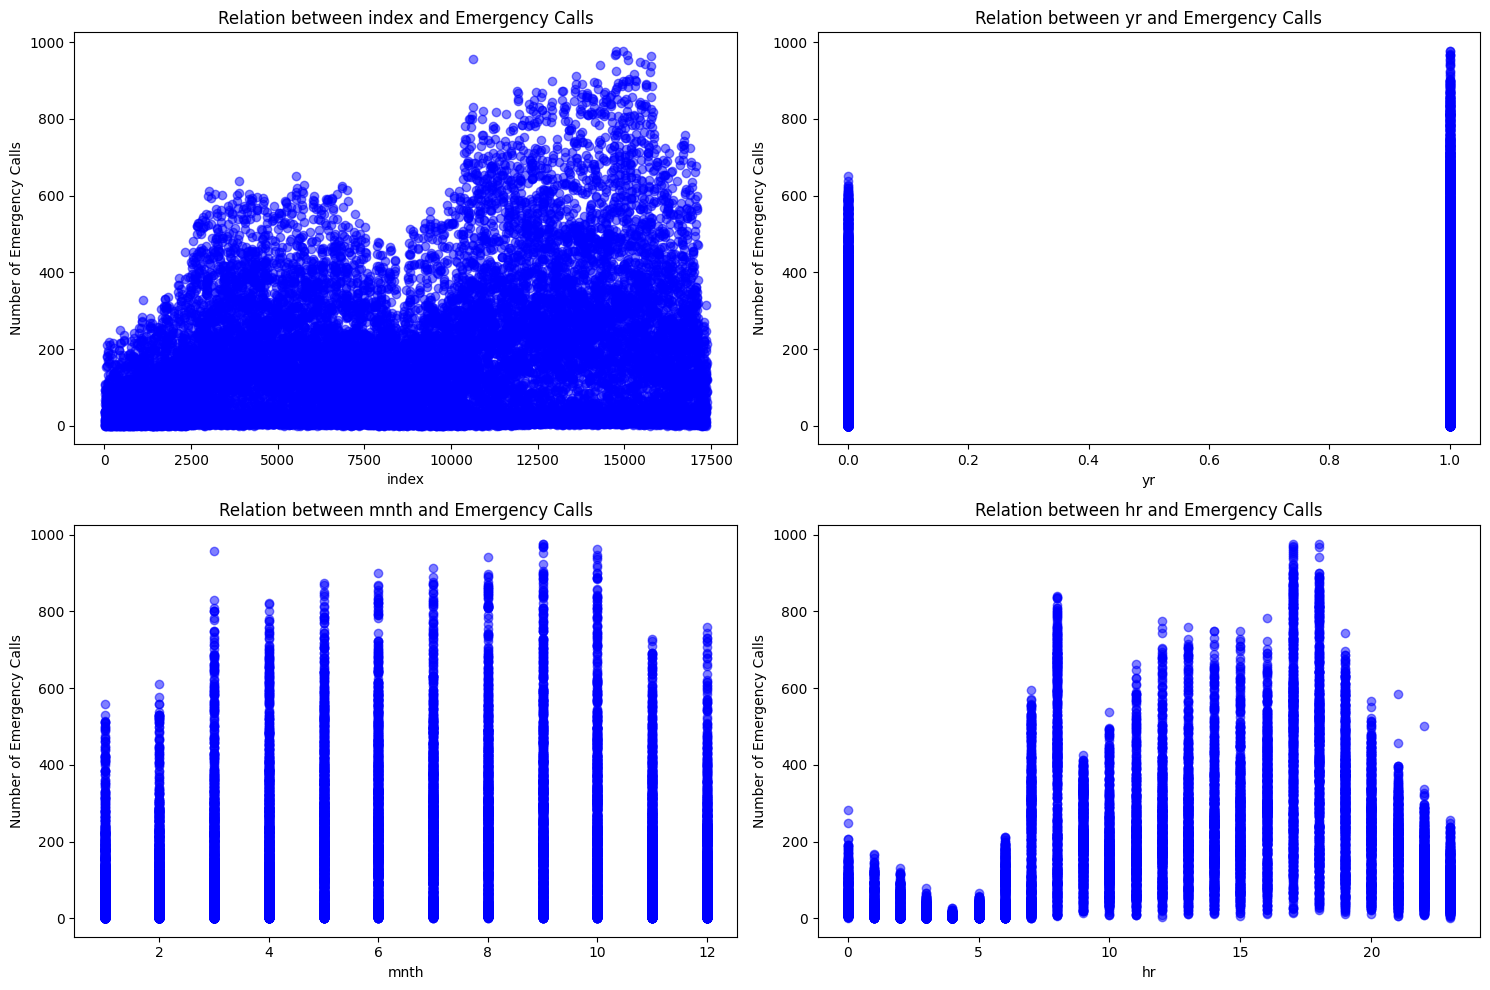

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 2, figsize=(15, 10))

for var, subplot in zip(data_numerical.drop('cnt', axis=1), ax.flatten()):
    subplot.scatter(data_numerical[var], data_numerical['cnt'], alpha=0.5, color='blue')
    subplot.set_xlabel(var)
    subplot.set_ylabel('Number of Emergency Calls')
    subplot.set_title(f'Relation between {var} and Emergency Calls')

plt.tight_layout()
plt.show()


**Завдання 12** побудуйте графіки співвідношення `boxplot`[boxplot](https://matplotlib.org/stable/gallery/statistics/boxplot_demo.html) між категоріальними змінними і цільовою змінною `cnt`.

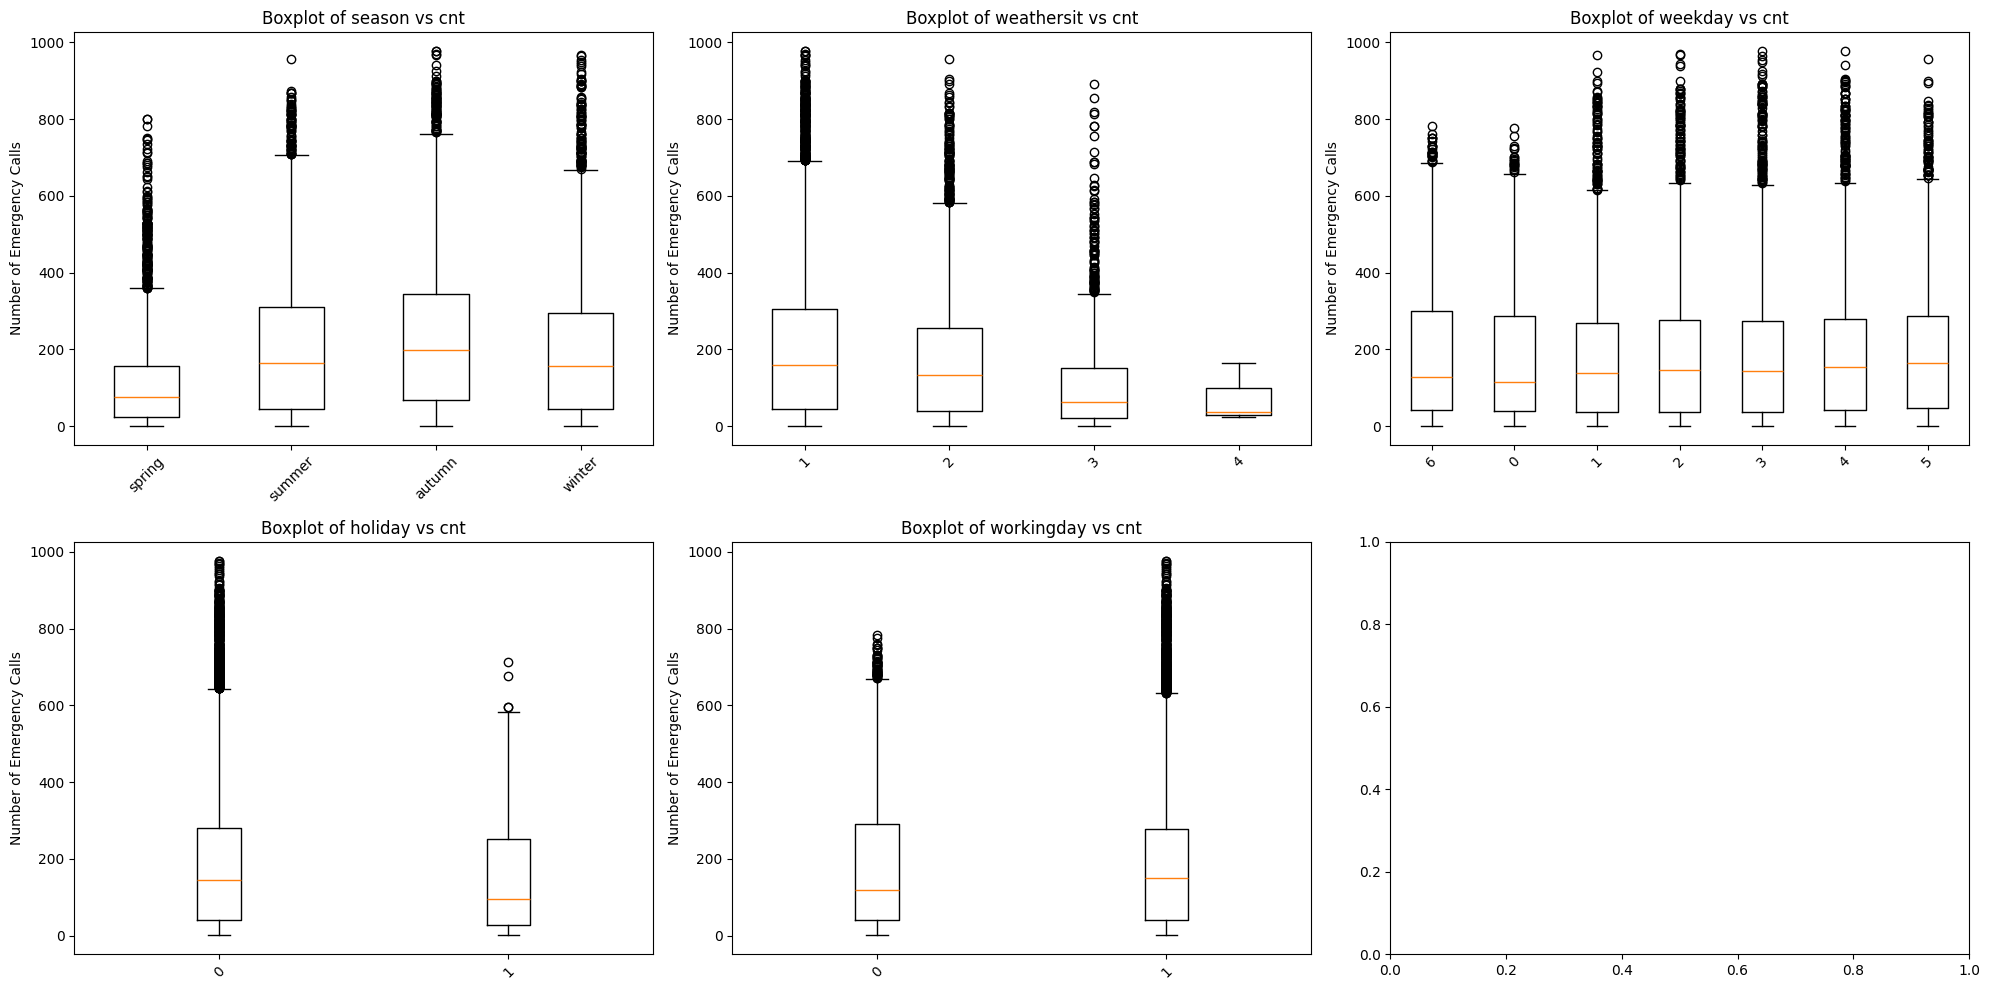

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 3, figsize=(20, 10))

category_columns = ['season', 'weathersit', 'weekday', 'holiday', 'workingday']
for var, subplot in zip(category_columns, ax.flatten()):
    subplot.boxplot([data_numerical['cnt'][data_categorical[var] == category] for category in data_categorical[var].unique()])
    subplot.set_title(f'Boxplot of {var} vs cnt')
    subplot.set_ylabel('Number of Emergency Calls')
    subplot.set_xticklabels(data_categorical[var].unique(), rotation=45)

plt.tight_layout()
plt.show()


**Висновки з 11-12 завдання (детальні)**



1.  For each numeric variable, a scatter plot was constructed, showing how changing the variable (e.g., hour, month, index) affects the number of calls. 
2.  For categorical variables such as season, weather, day of the week, holidays, and workday, a boxplot was constructed to show their effect on the number of calls.
3. ...



**Завдання 13** Побудувати матрицю кореляції:  

1.   Вирахувати кореляційні коефіціенти для набору данних за методом Пірсона
2.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти  
3.   Вирахувати кореляційні коефіціенти для набору данних за методом Спірмана
4.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти

5. Описати отримані результати, спираючись на значення коефіціентів кореляції та пояснити в чому відмінність обраних методів.

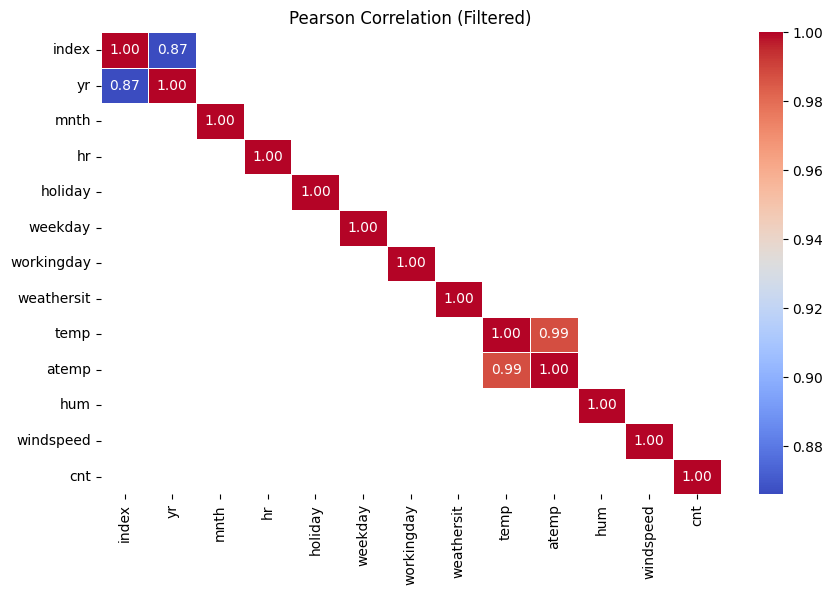

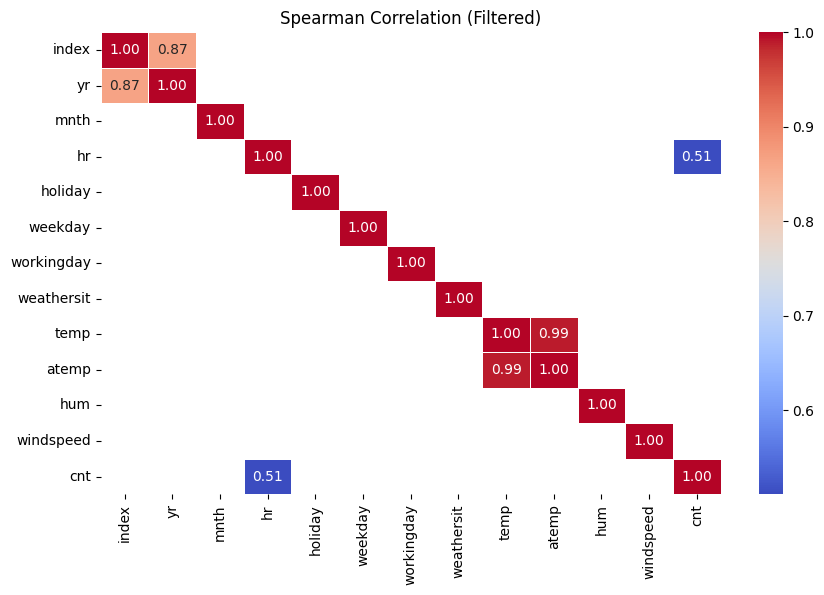

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("motorbike_ambulance_calls.csv")

data_numerical = data.select_dtypes(include=['number'])

pearson_corr = data_numerical.corr(method='pearson')

mask = (pearson_corr > 0.5) | (pearson_corr < -0.5)

plt.figure(figsize=(10, 6))
sns.heatmap(pearson_corr[mask], annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Pearson Correlation (Filtered)')
plt.show()

spearman_corr = data_numerical.corr(method='spearman')

mask_spearman = (spearman_corr > 0.5) | (spearman_corr < -0.5)

plt.figure(figsize=(10, 6))
sns.heatmap(spearman_corr[mask_spearman], annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Spearman Correlation (Filtered)')
plt.show()


In [65]:
#Temperature and the number of ambulance calls have the strongest correlation in both methods, indicating that temperature is an important factor influencing the frequency of calls.

**Завдання 14** 
1. побудувати модель лінійної регресії:
2. видалити змінні, які НЕ є релевантними;

3. поділити вибірку на `train`, `test` та `validation` в пропорції `70/30`;  

4. провести навчання моделі лінійної регресії;

1. Для подальшої роботи з моделями для кожної категоріальної змінної ми створимо фіктивні змінні, щоб уникнути неправильного порядку категорій. [get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)

In [85]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

data = pd.read_csv("motorbike_ambulance_calls.csv")

print("Текстові стовпці:")
print(data.select_dtypes(include=['object']).columns)

if 'date' in data.columns:
    data['date'] = pd.to_datetime(data['date'], errors='coerce')  

print("\nПропущені значення:")
print(data.isnull().sum())

numerical_columns = data.select_dtypes(include=['number']).columns  
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].mean())  

print("\nПропущені значення після заповнення:")
print(data.isnull().sum())

def get_dummies(df: pd.DataFrame):
  
    features = pd.concat([df, pd.get_dummies(df['season'], prefix='season')], axis=1)

    features = features.drop(['season', 'mnth', 'weekday', 'weathersit', 'date'], axis=1)  
    return features

features = get_dummies(data)

train, test = train_test_split(features, test_size=0.3, random_state=42)

train, val = train_test_split(train, test_size=0.3, random_state=42)

X_train = train.drop('cnt', axis=1)  
y_train = train['cnt']  
X_test = test.drop('cnt', axis=1)
y_test = test['cnt']
X_val = val.drop('cnt', axis=1)
y_val = val['cnt']

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Текстові стовпці:
Index(['date', 'season'], dtype='object')

Пропущені значення:
index         0
date          0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

Пропущені значення після заповнення:
index         0
date          0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64
Mean Squared Error: 19111.787466291753


C:\Users\Artur\AppData\Local\Temp\ipykernel_8808\1155962432.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['date'] = pd.to_datetime(data['date'], errors='coerce')


In [ ]:
features = get_dummies(data)

2. На основі змінної часу створіть нову змінну, яка відповідатиме за день і ніч.

In [89]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

data = pd.read_csv("motorbike_ambulance_calls.csv")

data['night_hours'] = data['hr'].apply(lambda x: 1 if x >= 22 or x < 6 else 0)

print(data[['hr', 'night_hours']].head())

def get_dummies(df: pd.DataFrame):
    features = pd.concat([df, pd.get_dummies(df['season'], prefix='season')], axis=1)
    features = features.drop(['season', 'mnth', 'weekday', 'weathersit', 'date'], axis=1)  
    return features

features = get_dummies(data)

train, test = train_test_split(features, test_size=0.3, random_state=42)

train, val = train_test_split(train, test_size=0.3, random_state=42)

X_train = train.drop('cnt', axis=1)  
y_train = train['cnt']  
X_test = test.drop('cnt', axis=1)
y_test = test['cnt']
X_val = val.drop('cnt', axis=1)
y_val = val['cnt']

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


   hr  night_hours
0   0            1
1   1            1
2   2            1
3   3            1
4   4            1
Mean Squared Error: 14915.005915181779


**Модель лінійної регрессії  

[train_linear_model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

Після отримання фіктивних змінних потрібно видалити по одній з кожної категорії, щоб запобігти мультиколінеарності. Також видаляємо ще два атрибути `date` та `atemp` - поясніть чому?

In [ ]:
features_lr = features.drop(['spring', 'mnth_4', 'weekday_0', 'weathersit_1', 'hr_0','atemp', 'date'], axis = 1)

In [97]:
features = get_dummies(data)

print(features.columns)

features_lr = features.drop(['mnth_4', 'weekday_0', 'weathersit_1', 'hr_0', 'atemp'], axis=1, errors='ignore')  

def get_train_data(df: pd.DataFrame, target: str, test_size: float):
    X = df.drop(target, axis=1)  
    y = df[target]  
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, shuffle=True)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_train_data(features_lr, 'cnt', 0.3)

def train_linear_model(X_train, y_train):
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model

model = train_linear_model(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print('MSE train: {:.3f}, test: {:.3f}'.format(
    mean_squared_error(y_train, y_train_pred),
    mean_squared_error(y_test, y_test_pred)))

print('R^2 train: {:.3f}, test: {:.3f}'.format(
    r2_score(y_train, y_train_pred),
    r2_score(y_test, y_test_pred)))


Index(['index', 'yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'cnt', 'season_autumn', 'season_spring', 'season_summer',
       'season_winter', 'mnth_1', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5',
       'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12',
       'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_1', 'weathersit_2',
       'weathersit_3', 'weathersit_4', 'hr_0', 'hr_1', 'hr_2', 'hr_3', 'hr_4',
       'hr_5', 'hr_6', 'hr_7', 'hr_8', 'hr_9', 'hr_10', 'hr_11', 'hr_12',
       'hr_13', 'hr_14', 'hr_15', 'hr_16', 'hr_17', 'hr_18', 'hr_19', 'hr_20',
       'hr_21', 'hr_22', 'hr_23'],
      dtype='object')
MSE train: 10448.098, test: 10101.710
R^2 train: 0.688, test: 0.680


In [95]:
X_train, X_test, y_train, y_test = get_train_data(features_lr, 'cnt', 0.3)

In [94]:
def train_linear_model(X_train, y_train):
  model = LinearRegression()
  model.fit(X_train, y_train)
  return model

model = train_linear_model(X_train, y_train)

In [93]:
# predict
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
# scores
print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 10448.098, test: 10101.710
R^2 train: 0.688, test: 0.680


Оскільки в нашій моделі є багато незалежних змінних, ми не можемо відобразити їх залежність у двовимірному просторі, але ми можемо побудувати графік взаємозв'язку між залишками моделі та передбачуваними значеннями, що також допоможе нам оцінити якість моделі.

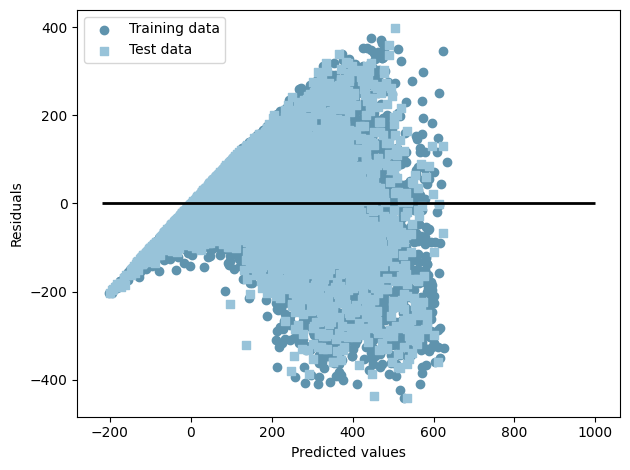

In [98]:
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='#5f93ad', marker='o', label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='#98c3d9', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-220, xmax=1000, lw=2, color='#000000')
plt.tight_layout()

**Висновки з завдання (детальні)**



1.   The linear regression model works well with the data because it has an R² value close to 0.7 for both training and test data.
2.   The model does not suffer from overfitting because the MSE values ​​on the test and training data are similar.
3.   Further improvement of the model is needed: for example, you can try other regression methods or further optimize the hyperparameters of the model to improve accuracy.

